## Preliminary Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

The data used here comes from the NOAA Deep Sea Coral and Sponge Map (https://www.ncei.noaa.gov/products/noaa-deep-sea-coral-and-sponge-map).

In [2]:
df=pd.read_csv('deep_sea_coral_sponge_data.csv')

C:\Users\Sam She\AppData\Local\Temp\ipykernel_26936\2917557790.py:1: DtypeWarning: Columns (5,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('deep_sea_coral_sponge_data.csv')


In [3]:
df #First look at dataframe

,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,...,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,DatasetID,ShallowFlag
0,1,"Smithsonian Institution, National Museum of Na...",Pourtalosmilia conferta,stony coral (branching),species,5660,4/14/1964,34.95839,-75.32464,146.0,...,NaN,SB1964,"Smithsonian Institution, National Museum of Na...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 46851,NMNH_IZ,0
1,2,"Smithsonian Institution, National Museum of Na...",Pourtalosmilia conferta,stony coral (branching),species,5660,4/14/1964,34.95839,-75.32464,146.0,...,NaN,SB1964,"Smithsonian Institution, National Museum of Na...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 46852,NMNH_IZ,0
2,3,"Smithsonian Institution, National Museum of Na...",Pourtalosmilia conferta,stony coral (branching),species,332,3/24/1958,29.28357,-88.26665,84.0,...,NaN,SB1958,"Smithsonian Institution, National Museum of Na...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 46853,NMNH_IZ,0
3,4,"Smithsonian Institution, National Museum of Na...",Pourtalosmilia conferta,stony coral (branching),species,134,6/21/1963,24.48375,-80.88314,191.0,...,NaN,GERD1963 - 6333,"Smithsonian Institution, National Museum of Na...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 46854,NMNH_IZ,0
4,8,"Smithsonian Institution, National Museum of Na...",Desmophyllum pertusum,stony coral (branching),species,105,7/27/1964,30.96684,-79.69976,396.0,...,NaN,PBRY1964,"Smithsonian Institution, National Museum of Na...",morphological ID by taxonomic expert,NaN,NaN,specimen,USNM 46020,NMNH_IZ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911337,1178238,"Smithsonian Institution, National Museum of Na...",Primnoa pacifica,gorgonian coral,species,NaN,6/14/2006,59.02420,-136.17112,17.0,...,NaN,NaN,"Smithsonian Institution, National Museum of Na...",NaN,NaN,NaN,specimen,USNM 1099632,NMNH_IZ,1
911338,1178240,"Smithsonian Institution, National Museum of Na...",Primnoa pacifica,gorgonian coral,species,NaN,6/14/2006,59.02420,-136.17112,18.0,...,NaN,NaN,"Smithsonian Institution, National Museum of Na...",NaN,NaN,NaN,specimen,USNM 1099631,NMNH_IZ,1
911339,1178271,"Smithsonian Institution, National Museum of Na...",Amphilectus digitatus,demosponge,species,NaN,7/9/2015,56.38830,-134.61990,18.0,...,NaN,NaN,"Smithsonian Institution, National Museum of Na...",NaN,NaN,SCUBA,specimen,USNM 1478858,NMNH_IZ,1
911340,1178132,"Smithsonian Institution, National Museum of Na...",Calcigorgia spiculifera,gorgonian coral,species,NaN,6/18/2004,56.38820,-134.61941,24.0,...,NaN,NaN,"Smithsonian Institution, National Museum of Na...",NaN,NaN,SCUBA,specimen,USNM 1484118,NMNH_IZ,1


In [4]:
df.keys()

Index(['CatalogNumber', 'DataProvider', 'ScientificName',
       'VernacularNameCategory', 'TaxonRank', 'Station', 'ObservationDate',
       'latitude', 'longitude', 'DepthInMeters', 'DepthMethod', 'Locality',
       'LocationAccuracy', 'SurveyID', 'Repository', 'IdentificationQualifier',
       'EventID', 'SamplingEquipment', 'RecordType', 'SampleID', 'DatasetID',
       'ShallowFlag'],
      dtype='object')

In [5]:
species_list=[]
for species in df["ScientificName"]:
    if species not in species_list:
        species_list.append(species)
        
name_list=[]
for name in df["VernacularNameCategory"]:
    if name not in name_list:
        name_list.append(name)

In [6]:
print(len(species_list)) #how many species are present?
print(len(name_list)) #how many vernacular names are present?

3685
19


In [7]:
print(name_list) #what are the vernacular names?

['stony coral (branching)', 'stony coral (cup coral)', 'black coral', 'gorgonian coral', 'soft coral', 'stoloniferan coral', 'sea pen', 'lace coral', 'gold coral', 'lithotelestid coral', 'stony coral (unspecified)', 'sponge (unspecified)', 'demosponge', 'glass sponge', 'homoscleromorph sponge', 'calcareous sponge', 'other coral-like hydrozoan', 'alcyonacean (unspecified)', nan]


In [8]:
print(sum(df.VernacularNameCategory=='nan')) #how many have no vernacular name?

0


In [9]:
target_sponge_name_list=['demosponge','glass sponge','homoscleromorph sponge','calcareous sponge'] #list of higher sponge clades present, as per vernacular names

In [10]:
#create dataframe of just sponges
sponge_df=df[df.VernacularNameCategory=='sponge (unspecified)']
for name in target_sponge_name_list:
    print(name)
    sponge_df=pd.concat([sponge_df,df[df.VernacularNameCategory==name]])

demosponge
glass sponge
homoscleromorph sponge
calcareous sponge


In [11]:
#test to make sure all sponges are actually present
sponge_name_list=[]
for name in sponge_df["VernacularNameCategory"]:
    if name not in sponge_name_list:
        sponge_name_list.append(name)
print(sponge_name_list)

['sponge (unspecified)', 'demosponge', 'glass sponge', 'homoscleromorph sponge', 'calcareous sponge']


In [12]:
#sanity check for quantity of sponges vs total dataframe
print(len(sponge_df["VernacularNameCategory"]))
print(len(df["VernacularNameCategory"]))

327515
911342


In [13]:
#seperate sponges based on higher clade
uncat_df=df[df.VernacularNameCategory=='sponge (unspecified)']
demo_df=df[df.VernacularNameCategory=='demosponge']
glass_df=df[df.VernacularNameCategory=='glass sponge']
homo_df=df[df.VernacularNameCategory=='homoscleromorph sponge']
calc_df=df[df.VernacularNameCategory=='calcareous sponge']

In [14]:
#find count of each clade, ignoring uncategorized for now:
print(len(demo_df.VernacularNameCategory))
print(len(glass_df.VernacularNameCategory))
print(len(homo_df.VernacularNameCategory))
print(len(calc_df.VernacularNameCategory))

80791
86974
410
1210


Text(0, 0.5, 'Latitude (degrees)')

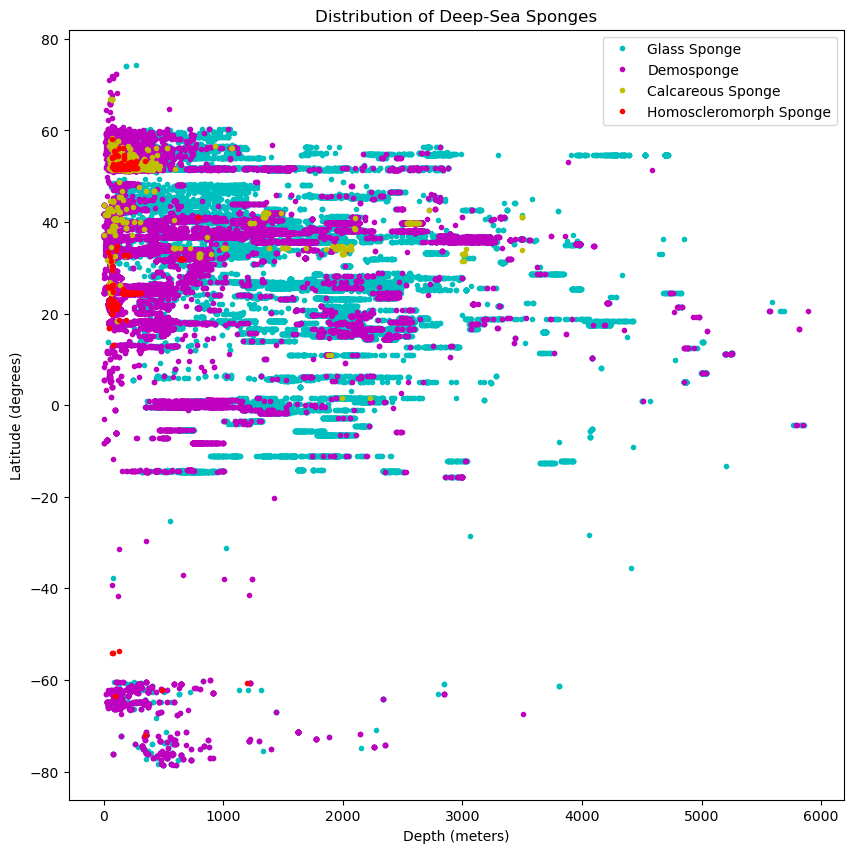

In [15]:
#Preliminary plot of data
plt.figure(figsize=(10,10))
plt.plot(glass_df.DepthInMeters,glass_df.latitude,'.',color='c',label='Glass Sponge')
plt.plot(demo_df.DepthInMeters,demo_df.latitude,'.',color='m',label='Demosponge')
plt.plot(calc_df.DepthInMeters,calc_df.latitude,'.',color='y',label='Calcareous Sponge')
plt.plot(homo_df.DepthInMeters,homo_df.latitude,'.',color='r',label='Homoscleromorph Sponge')
plt.legend()
plt.title("Distribution of Deep-Sea Sponges")
plt.xlabel("Depth (meters)")
plt.ylabel("Latitude (degrees)")

## Deeper Analysis

Text(0, 0.5, 'Latitude (degrees)')

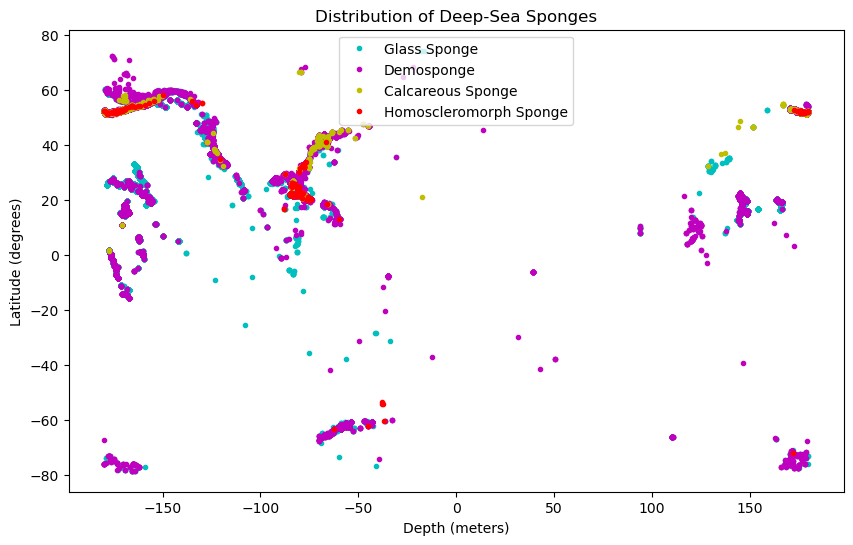

In [16]:
#Preliminary plot of data
plt.figure(figsize=(10,6))
plt.plot(glass_df.longitude,glass_df.latitude,'.',color='c',label='Glass Sponge')
plt.plot(demo_df.longitude,demo_df.latitude,'.',color='m',label='Demosponge')
plt.plot(calc_df.longitude,calc_df.latitude,'.',color='y',label='Calcareous Sponge')
plt.plot(homo_df.longitude,homo_df.latitude,'.',color='r',label='Homoscleromorph Sponge')
plt.legend()
plt.title("Distribution of Deep-Sea Sponges")
plt.xlabel("Depth (meters)")
plt.ylabel("Latitude (degrees)")

In [23]:
glass_species_dict={}
glass_species_list=[]
for species in glass_df["ScientificName"]:
    if species not in glass_species_list:
        glass_species_list.append(name)
        glass_species_dict[name]=1
    else:
        glass_species_dict[name]=glass_species_list[name]+1

In [27]:
print(glass_species_dict)

{'calcareous sponge': 1}
